In [1]:
import os
import logging
import datetime
import json
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_notebook, show

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
hr_nm = "18"
tst_path = "data/" + hr_nm + '/StreamToS3-5-2017-10-22-' + '*'
print(tst_path)

data/18/StreamToS3-5-2017-10-22-*


In [4]:
hour18 = glob.glob(tst_path)
hour18.sort
#hour18

<function list.sort>

In [5]:
day22 = glob.glob('data/*/StreamToS3-5-2017-10-22-*')
day22.sort()
#day22

In [6]:
len(day22)

1146

In [7]:
newsletter_traffic = []
for pth_f_name in day22:
    logger = logging.getLogger()
    with open(pth_f_name, "r") as f:
        print("Reading " + pth_f_name)
        contents = f.read()
        for bit in contents[1:-1].split('}{'):
            try:
                rec = json.loads("{" + bit + "}")
                newsletter_traffic.append(rec)
            except ValueError as e:
                logger.warning("BAD JSON")
                continue

Reading data/00/StreamToS3-5-2017-10-22-00-01-18-4c3dcc63-7078-4102-8dbe-e5e4f2fb4716
Reading data/00/StreamToS3-5-2017-10-22-00-02-23-f2f1bf73-412b-4030-bf1b-444885930674
Reading data/00/StreamToS3-5-2017-10-22-00-02-44-5eedaa46-9131-49f1-88a4-9d5cc46878c1
Reading data/00/StreamToS3-5-2017-10-22-00-04-45-163101c8-c5e4-4a7a-8eb9-4a7808f0e9a9
Reading data/00/StreamToS3-5-2017-10-22-00-06-19-e5e48804-6f15-4246-9bcc-c07445c51e1f
Reading data/00/StreamToS3-5-2017-10-22-00-07-24-5c92030f-26cc-4d7e-a4b0-2785b4ce8840
Reading data/00/StreamToS3-5-2017-10-22-00-07-44-6f999803-52d9-4927-89fe-bf1d6728daa5
Reading data/00/StreamToS3-5-2017-10-22-00-09-41-8a93b1f0-ba18-43ac-af74-cc7e28592087
Reading data/00/StreamToS3-5-2017-10-22-00-11-20-747f1bf8-bc0e-4ef3-bca6-89d0cdd98164
Reading data/00/StreamToS3-5-2017-10-22-00-12-24-3ea7b9b7-ac93-44fd-9eae-b4b71436327b
Reading data/00/StreamToS3-5-2017-10-22-00-12-44-31f83e30-f5b7-4d5d-a1e1-ca6da7394f36
Reading data/00/StreamToS3-5-2017-10-22-00-14-47-0e821

Reading data/02/StreamToS3-5-2017-10-22-02-05-25-ae25ab8e-1809-445d-a3e0-4d47fcb855c2
Reading data/02/StreamToS3-5-2017-10-22-02-06-54-cad7e6dc-c6be-47cb-8353-ad21236523ad
Reading data/02/StreamToS3-5-2017-10-22-02-07-55-1fc48331-94c7-40e4-9651-ca772c0fa1fc
Reading data/02/StreamToS3-5-2017-10-22-02-08-18-68f66c14-1d11-4b39-89b1-c10d4dfe27dc
Reading data/02/StreamToS3-5-2017-10-22-02-10-26-91533005-6075-4953-a529-eff776088504
Reading data/02/StreamToS3-5-2017-10-22-02-11-54-3a9826de-13ca-47ce-add2-54e4f5125a32
Reading data/02/StreamToS3-5-2017-10-22-02-12-59-dbab2d6f-fd60-4b2b-82b6-5b0af8e11cdd
Reading data/02/StreamToS3-5-2017-10-22-02-13-21-cd80d857-13a7-4c01-83a4-309ad80a7c2e
Reading data/02/StreamToS3-5-2017-10-22-02-15-26-43e20a4c-3f08-4980-ac13-ac81595744f8
Reading data/02/StreamToS3-5-2017-10-22-02-16-54-b85a39d3-9195-4239-be84-d4305d91ece4
Reading data/02/StreamToS3-5-2017-10-22-02-17-59-55936744-da8d-4784-8cd9-8362a45da5ca
Reading data/02/StreamToS3-5-2017-10-22-02-18-21-079f4

Reading data/04/StreamToS3-5-2017-10-22-04-10-55-a4268270-db21-4d81-a3b9-c2624ff276fd
Reading data/04/StreamToS3-5-2017-10-22-04-12-12-af2a3957-9372-4f04-8328-5ee294d84d80
Reading data/04/StreamToS3-5-2017-10-22-04-13-25-9bff1e44-5168-4b7e-be69-dab10e7a86f1
Reading data/04/StreamToS3-5-2017-10-22-04-13-57-8911cc92-8e52-4845-87e5-28e9b4788ac9
Reading data/04/StreamToS3-5-2017-10-22-04-16-00-4ee8f48d-b128-42f9-bed7-4c066d7cddcd
Reading data/04/StreamToS3-5-2017-10-22-04-17-34-cd7b5357-4615-4230-a458-224b2d673fa3
Reading data/04/StreamToS3-5-2017-10-22-04-18-25-6085990f-5a81-4016-a771-f07578b2bc5a
Reading data/04/StreamToS3-5-2017-10-22-04-18-58-9272cd5e-30ca-4c65-92e3-51fda0c9765c
Reading data/04/StreamToS3-5-2017-10-22-04-21-00-20b79b7a-f7b0-4239-ba8e-aa69331bf386
Reading data/04/StreamToS3-5-2017-10-22-04-22-30-bf7f277c-3bc1-4981-acd7-24f639dceb72
Reading data/04/StreamToS3-5-2017-10-22-04-23-25-0ec5a4bc-3b0c-4d04-8685-78cd4a981f08
Reading data/04/StreamToS3-5-2017-10-22-04-23-59-f2616

Reading data/06/StreamToS3-5-2017-10-22-06-13-49-7e12b67e-87c4-4870-ab82-6d65d94632ad
Reading data/06/StreamToS3-5-2017-10-22-06-14-23-03340654-bf72-4d39-b387-f03d918343b3
Reading data/06/StreamToS3-5-2017-10-22-06-16-28-1e8a0ae6-4be6-4686-8a84-15b7d9081659
Reading data/06/StreamToS3-5-2017-10-22-06-17-56-273412fc-005d-43dd-931a-0b524c8a1022
Reading data/06/StreamToS3-5-2017-10-22-06-18-49-7ee73095-fefd-484b-9cf9-8e8f152a7f8e
Reading data/06/StreamToS3-5-2017-10-22-06-19-24-ad1a3272-e175-406e-84c1-cf92c1b77e00
Reading data/06/StreamToS3-5-2017-10-22-06-21-29-dd942ba5-0629-4f73-8ede-947ca8e25ca9
Reading data/06/StreamToS3-5-2017-10-22-06-22-56-7237aeee-f5a4-4239-a8ac-467ed2ddde01
Reading data/06/StreamToS3-5-2017-10-22-06-23-53-15241b31-364c-47ea-9098-4f8f0a725bfe
Reading data/06/StreamToS3-5-2017-10-22-06-24-25-a1aea7c2-50d0-4f80-b897-0b65f17d6844
Reading data/06/StreamToS3-5-2017-10-22-06-26-29-996ab556-1d67-46bb-951d-59a340f50d4d
Reading data/06/StreamToS3-5-2017-10-22-06-27-54-8f0c6

Reading data/08/StreamToS3-5-2017-10-22-08-52-12-d6212564-d332-4e6e-bd80-b7e7bd84de5f
Reading data/08/StreamToS3-5-2017-10-22-08-53-21-7584455b-2d55-4f0f-bc83-a1a4fe8cfd5f
Reading data/08/StreamToS3-5-2017-10-22-08-54-30-fed9f328-3336-4b3c-a6d1-1cf1879c59f7
Reading data/08/StreamToS3-5-2017-10-22-08-54-52-0a8a2439-20b4-4b3d-bd7b-eb1c75bc0f17
Reading data/08/StreamToS3-5-2017-10-22-08-57-16-64d4f1bb-ba7e-4793-a3c7-36f87e7a7154
Reading data/08/StreamToS3-5-2017-10-22-08-58-25-a819229f-54fc-43ff-9469-9d734b13cf1f
Reading data/08/StreamToS3-5-2017-10-22-08-59-35-1d1276c8-5738-4712-ad63-533418348e29
Reading data/08/StreamToS3-5-2017-10-22-08-59-53-8d383826-4845-4f89-b942-9c35e232b7e9
Reading data/09/StreamToS3-5-2017-10-22-09-02-13-186d70a0-2963-45a8-9441-ed084dc7bf95
Reading data/09/StreamToS3-5-2017-10-22-09-03-31-c64119d5-87fb-46ee-94b1-57757e745297
Reading data/09/StreamToS3-5-2017-10-22-09-04-36-7d93fbef-f3b1-4011-839c-d8b1b090d7f2
Reading data/09/StreamToS3-5-2017-10-22-09-04-51-5a1d7

Reading data/10/StreamToS3-5-2017-10-22-10-55-18-bd698a85-a5c1-414c-aefe-88fbfc3432cc
Reading data/10/StreamToS3-5-2017-10-22-10-57-42-d7a1ef45-a5a7-4bcb-8edb-7de479e66e1a
Reading data/10/StreamToS3-5-2017-10-22-10-58-48-d2ee1fc2-fac2-4dca-964a-38cf85a0fc42
Reading data/10/StreamToS3-5-2017-10-22-10-59-54-e682474e-b43b-4e30-a94f-c867e32ebbec
Reading data/11/StreamToS3-5-2017-10-22-11-00-23-bfd5b8b1-b52f-4fa3-baf4-33c5e4b264ed
Reading data/11/StreamToS3-5-2017-10-22-11-02-43-78295ddf-7bbd-4991-91b8-858e05af03aa
Reading data/11/StreamToS3-5-2017-10-22-11-03-53-e7263a66-a646-4d8a-9eb7-57419a2cb1d2
Reading data/11/StreamToS3-5-2017-10-22-11-04-59-75e0fc43-cc28-460e-8b55-06071b5c983a
Reading data/11/StreamToS3-5-2017-10-22-11-05-23-f81300c0-84ee-4a1c-a96e-9deb43d78d79
Reading data/11/StreamToS3-5-2017-10-22-11-07-39-b542d486-37ae-4b1e-a81c-bd8a945817f9
Reading data/11/StreamToS3-5-2017-10-22-11-08-52-666243d4-3550-4a09-961c-91cf5ace862c
Reading data/11/StreamToS3-5-2017-10-22-11-09-59-0d61c

Reading data/13/StreamToS3-5-2017-10-22-13-04-23-f60bf28f-7e5e-46b7-b7ab-9930d9b8db64
Reading data/13/StreamToS3-5-2017-10-22-13-05-25-a9d8e2f9-d2aa-4b63-91bc-928ba1de66e9
Reading data/13/StreamToS3-5-2017-10-22-13-05-50-bf3bc9bf-e93b-45cc-a753-7e31e6c5daaf
Reading data/13/StreamToS3-5-2017-10-22-13-08-10-5e995678-60c1-4e1f-99e5-ee0c7fd0c5b4
Reading data/13/StreamToS3-5-2017-10-22-13-09-24-25168f34-622a-4e12-80db-392bd3109b1d
Reading data/13/StreamToS3-5-2017-10-22-13-10-25-71ab0b5d-3516-4a9c-a122-2150b38bf6ba
Reading data/13/StreamToS3-5-2017-10-22-13-10-51-64cfc85e-3751-4d88-87bc-e65b4ac56832
Reading data/13/StreamToS3-5-2017-10-22-13-13-10-5b664711-d526-4f45-9987-d66db5501404
Reading data/13/StreamToS3-5-2017-10-22-13-14-24-481ffd29-da3c-4d52-b8df-b7b38ed00072
Reading data/13/StreamToS3-5-2017-10-22-13-15-25-e70cb742-a9b5-4373-b019-5ae208f2b7e4
Reading data/13/StreamToS3-5-2017-10-22-13-15-51-8af6636f-add1-4d5e-b1b3-06f4248a18e9
Reading data/13/StreamToS3-5-2017-10-22-13-18-11-0e6d6

Reading data/15/StreamToS3-5-2017-10-22-15-04-48-7145f012-cd42-4189-b0d6-c8424ec6b316
Reading data/15/StreamToS3-5-2017-10-22-15-05-58-3befd780-5f4a-4de2-be45-1ea765b0cbc8
Reading data/15/StreamToS3-5-2017-10-22-15-06-16-1ef07083-a11a-4f5a-b7a0-515b9201785f
Reading data/15/StreamToS3-5-2017-10-22-15-08-41-45a48a52-286b-406d-b2a1-caa9cc748398
Reading data/15/StreamToS3-5-2017-10-22-15-09-51-141eca24-4816-44e4-88bd-3cfa5ac1a3eb
Reading data/15/StreamToS3-5-2017-10-22-15-10-58-57f86286-90c7-4a11-a998-9baabb34aac4
Reading data/15/StreamToS3-5-2017-10-22-15-11-20-ec5ca8a1-e97a-4b85-8d46-f0e03bee6f54
Reading data/15/StreamToS3-5-2017-10-22-15-13-40-3d36f633-3a27-4872-8664-7755951c3f5d
Reading data/15/StreamToS3-5-2017-10-22-15-14-55-e49948c7-9ebe-418a-bf99-d6542ae2de0e
Reading data/15/StreamToS3-5-2017-10-22-15-15-59-99d85607-abde-444c-93c7-e8ac18a7915a
Reading data/15/StreamToS3-5-2017-10-22-15-16-21-62281304-e922-4093-a1ad-2d50455668ea
Reading data/15/StreamToS3-5-2017-10-22-15-18-46-04454

Reading data/17/StreamToS3-5-2017-10-22-17-09-09-3539f861-bde4-4133-bece-a243ebeeff44
Reading data/17/StreamToS3-5-2017-10-22-17-10-38-f3f9f778-66b7-4d80-ac00-a849fe9579fe
Reading data/17/StreamToS3-5-2017-10-22-17-11-34-6e087d40-7d55-4fc1-8e4a-dd118f7f307d
Reading data/17/StreamToS3-5-2017-10-22-17-12-03-5eb1ba71-e9bf-47b5-afdc-f8e150042e42
Reading data/17/StreamToS3-5-2017-10-22-17-14-10-8b490822-9c27-4b77-8123-74b630958622
Reading data/17/StreamToS3-5-2017-10-22-17-15-43-b4a10bdb-c66d-4406-9cc0-d99c0f6ab0df
Reading data/17/StreamToS3-5-2017-10-22-17-16-30-0f06a737-fe26-4ab5-9d84-9d089070031a
Reading data/17/StreamToS3-5-2017-10-22-17-17-04-5f9f3d8d-7fd5-4d2b-be18-ee1213901661
Reading data/17/StreamToS3-5-2017-10-22-17-19-11-73242ada-53fa-46ec-8e8f-f3a84d70e35f
Reading data/17/StreamToS3-5-2017-10-22-17-20-44-c8becfde-3867-49e0-9143-e25f8139ab4c
Reading data/17/StreamToS3-5-2017-10-22-17-21-36-2ad9bbfe-8bc5-40c2-9cb7-de1c5715c580
Reading data/17/StreamToS3-5-2017-10-22-17-22-03-a88c2

Reading data/19/StreamToS3-5-2017-10-22-19-12-05-9783173e-6a6e-4717-bb1a-448756204931
Reading data/19/StreamToS3-5-2017-10-22-19-12-26-0a37a2c6-d819-451a-9114-121973611874
Reading data/19/StreamToS3-5-2017-10-22-19-14-47-882058e6-8834-422d-a845-45d0fc2cee43
Reading data/19/StreamToS3-5-2017-10-22-19-16-18-aa97913b-419a-453d-b271-2ac9f8175494
Reading data/19/StreamToS3-5-2017-10-22-19-17-05-c5385ddb-a88a-4f91-ae5a-027cb207743d
Reading data/19/StreamToS3-5-2017-10-22-19-17-22-831175c0-56a4-4f5f-960b-0d9cb5d6a7f3
Reading data/19/StreamToS3-5-2017-10-22-19-19-45-3bf78b61-1faa-4a1d-a3d6-dd9b39c62bb5
Reading data/19/StreamToS3-5-2017-10-22-19-21-18-66bc47fb-0e65-4839-9da5-2d3e1dd26c2f
Reading data/19/StreamToS3-5-2017-10-22-19-22-06-86448842-0b60-4bf9-bb93-c2ad07d1ce36
Reading data/19/StreamToS3-5-2017-10-22-19-22-27-d22ba51f-fa66-4e44-be2d-e32f1eb4a9b0
Reading data/19/StreamToS3-5-2017-10-22-19-24-51-b17f8c46-1419-4116-8309-81c0ec41c9be
Reading data/19/StreamToS3-5-2017-10-22-19-26-19-e5702

Reading data/21/StreamToS3-5-2017-10-22-21-15-33-48625e79-1df7-4349-b6cf-1aed000ad77b
Reading data/21/StreamToS3-5-2017-10-22-21-16-22-f3705090-f32b-435a-a6ca-def292250b36
Reading data/21/StreamToS3-5-2017-10-22-21-17-26-d3ba2cbe-e793-438b-9845-837af5146995
Reading data/21/StreamToS3-5-2017-10-22-21-17-42-d73133bd-f9f1-405a-a979-9fb3eef0c6df
Reading data/21/StreamToS3-5-2017-10-22-21-20-33-698689f4-4828-4833-9e80-4a7c54d63094
Reading data/21/StreamToS3-5-2017-10-22-21-22-30-3ed485b9-0dd1-4d24-89c9-5969a84ae851
Reading data/21/StreamToS3-5-2017-10-22-21-22-30-57146ee8-9f2a-4ce6-a86a-1a1802d06dfe
Reading data/21/StreamToS3-5-2017-10-22-21-22-47-7c59edff-d5e0-4075-8efb-8ee9d70694bd
Reading data/21/StreamToS3-5-2017-10-22-21-25-34-74a7d860-7e37-4d8e-80ab-b424d44105f8
Reading data/21/StreamToS3-5-2017-10-22-21-27-31-97839e1d-45c6-4010-a3e0-17caaf396fc8
Reading data/21/StreamToS3-5-2017-10-22-21-27-31-e6009450-ea45-4c82-88b1-921716a97ac8
Reading data/21/StreamToS3-5-2017-10-22-21-27-47-112b3

Reading data/23/StreamToS3-5-2017-10-22-23-16-12-04007258-cec0-4f1f-b024-95dbba3e769c
Reading data/23/StreamToS3-5-2017-10-22-23-17-56-8895f21d-48cf-4976-b785-007b8fe595c8
Reading data/23/StreamToS3-5-2017-10-22-23-17-58-acf94a5d-6269-4631-b72a-ab9d1f1cb200
Reading data/23/StreamToS3-5-2017-10-22-23-18-19-ef2c153d-2ad0-4390-b610-bbe81024fb42
Reading data/23/StreamToS3-5-2017-10-22-23-21-13-6b8dadf1-36a4-4aae-a810-b0b7b17512a8
Reading data/23/StreamToS3-5-2017-10-22-23-22-58-c9c827eb-e772-4b2b-be32-eb122bcc9234
Reading data/23/StreamToS3-5-2017-10-22-23-22-59-2ab82d4b-919b-4d43-b43c-b7ced6ba4f16
Reading data/23/StreamToS3-5-2017-10-22-23-23-19-44381823-67eb-43ca-b53f-209702ccddcd
Reading data/23/StreamToS3-5-2017-10-22-23-26-14-2daf784b-9bb0-4ff3-9ad5-930a4d574e17
Reading data/23/StreamToS3-5-2017-10-22-23-27-58-78202706-342e-47ca-a660-dd5c7028d53d
Reading data/23/StreamToS3-5-2017-10-22-23-28-02-ecac4b25-3844-4720-9872-0a129179b0ed
Reading data/23/StreamToS3-5-2017-10-22-23-28-19-c0037

In [8]:
print(type(newsletter_traffic))
print(type(newsletter_traffic[0]))
newsletter_traffic[0]
len(newsletter_traffic)

<class 'list'>
<class 'dict'>


3763347

In [9]:
df = pd.DataFrame(newsletter_traffic)
df.head(3)

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
0,3.860072e+07,2.535983e+09,BOLT,10/19/2017 1:27:22 PM,http://m.facebook.com/,24444928,"Sun, 22 Oct 2017 00:01:18 GMT",Mozilla/5.0 (Linux; Android 7.1.2; Pixel Build...,19122e6f-fd31-42bb-840c-3936b20a7069,Guest
1,2.605384e+09,2.214594e+09,BOLT,10/16/2017 10:07:52 AM,None,24903680,"Sun, 22 Oct 2017 00:01:05 GMT",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,26bdbcfc-f0b1-449e-8c53-7bcd3cc0bd1a,Guest
2,1.000669e+09,3.673491e+09,GALLERY,10/3/2017 2:42:44 PM,http://m.facebook.com/,24248320,"Sun, 22 Oct 2017 00:01:14 GMT",Mozilla/5.0 (Linux; Android 7.0; SM-N920V Buil...,af2a13d0-eb5e-4e19-8366-c052fb827a2e,Guest


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763347 entries, 0 to 3763346
Data columns (total 10 columns):
authorKey        float64
contentKey       float64
pathRoot         object
publishedDate    object
referrer         object
siteKey          int64
timeStamp        object
userAgent        object
userId           object
userStatus       object
dtypes: float64(2), int64(1), object(7)
memory usage: 287.1+ MB


In [11]:
df.authorKey = df.authorKey.astype(str)
type(df.authorKey[2])

str

In [12]:
df.contentKey = df.contentKey.astype(str) 
df.siteKey = df.siteKey.astype(str)
df.timeStamp = pd.to_datetime(df.timeStamp)

#9:46 pm - 9:54 pm - 9:56 pm

#this cell is taking over 3 minutes 9:10 pm and counting
#9:16 pm

#6:06 pm - 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763347 entries, 0 to 3763346
Data columns (total 10 columns):
authorKey        object
contentKey       object
pathRoot         object
publishedDate    object
referrer         object
siteKey          object
timeStamp        datetime64[ns]
userAgent        object
userId           object
userStatus       object
dtypes: datetime64[ns](1), object(9)
memory usage: 287.1+ MB


In [14]:
df.describe()

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
count,3763347,3763347,3763347,3663206,3448102,3763347,3763342,3763347,3734151,3763347
unique,1051,7147,468,7142,14744,45,86632,57401,640365,2
top,1000669260.0,1793590908.0,GALLERY,10/12/2017 6:25:36 PM,http://m.facebook.com,24444928,2017-10-22 23:49:11,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,680b8738-4b5c-4428-85b1-dc3b36a0c61d,Guest
freq,885531,341979,2054484,341979,1593695,532170,137,93807,587,3666553
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-20 16:14:55,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-23 00:05:58,NaN,NaN,NaN


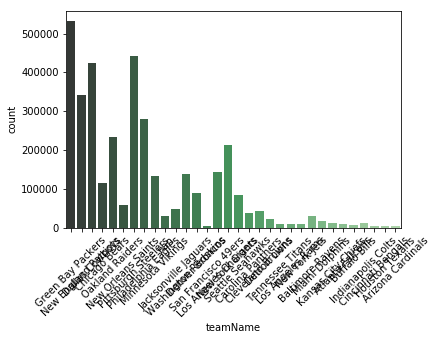

In [66]:
import seaborn as sns
g = sns.countplot(x = "teamName",
             data = df,
             palette = "Greens_d")
g.set_xticklabels(labels=df.teamName.unique(), rotation = 45) #not sure if the labels match
plt.show(g)

In [15]:
#!/usr/bin/env python3
import requests
import getpass

BASE_URL = "https://9n52ntmq97.execute-api.us-east-1.amazonaws.com/prod"
REQUEST_URL = "{base_url}/guess".format(base_url=BASE_URL)
WRONG = {
    "Arizona Cardinals": 23724032, #GOOD ALL 32 MATCHED, 0 LEFT
    "Atlanta Falcons": 23789568, #good 17 so far, 15 to go
    "Baltimore Ravens": 23855104, #good 18 so far, 14 to go
    "Buffalo Bills": 23920640, # good, 19 so far, 13 to go
    "Carolina Panthers": 23986176,# good, 20 so far, 12 to go
    "Chicago Bears": 24051712, #good #scout 67174400
    "Cincinnati Bengals": 24117248, #good, 24 so far, 8 to go
    "Cleveland Browns": 24182784, #good #not 75300864 scout
    "Dallas Cowboys": 24248320, #good #72876032 potentially scout
    "Denver Broncos": 24313856,#good 10 so far #72155136 scout
    "Detroit Lions": 24379392, #good, 22 right 10 to go # not 24313856
    "Green Bay Packers": 24444928, #good #69533696
    "Houston Texans": 24510464, #good, 31 so far, ONLY 1 LEFT
    "Indianapolis Colts": 24576000, #good, 25 so far, 7 to go
    "Jacksonville Jaguars": 24641536, #good 26 so far, 6 to go
    "Kansas City Chiefs": 24707072, #good 27 so far, 5 to go
    "Los Angeles Chargers": 25296896, # good, 23 so far, 9 to go
    "Los Angeles Rams": 25427968, #good 13 so far, 19 to go
    "Miami Dolphins": 24772608, #good, 28 so far, 4 to go
    "Minnesota Vikings": 24838144, # good 11 so far # potentially 69664768 scout
    "New England Patriots": 24903680, #good 12 so far
    "New Orleans Saints": 25624576, #good 15 so far, 17 to go
    "New York Giants": 24969216, #good
    "New York Jets": 25034752, #good, 29 so far, 3 to go
    "Oakland Raiders": 25100288, #good
    "Philadelphia Eagles": 25165824, #good
    "Pittsburgh Steelers": 25231360, #good #69992448
    "San Francisco 49ers": 25362432, #good 21 so far, 11 to go
    "Seattle Seahawks": 2490368, #good 14 so far, 18 to go
    "Tampa Bay Buccaneers": 25690112, #good, 30 so far, 2 to go
    "Tennessee Titans": 2097152, #good 16 so far, 16 to go
    "Washington Redskins": 25493504, #good #70189056 scout
}


def submit_request(guess, username):
    print("Submitting guess!")
    resp = requests.post(REQUEST_URL, json={
        "results": guess,
        "username": username
    })
    print(resp.text)


if __name__ == '__main__':
    print("Submitting guess for {} teams".format(len(WRONG)))
    submit_request(WRONG, getpass.getuser())

Submitting guess for 32 teams
Submitting guess!
{"statusCode": 200, "body": "You got 32 right!", "headers": {"Content-Type": "text/plain"}}


In [16]:
nm_dict = {str(v):str(k) for k,v in WRONG.items()}
nm_dict

{'2097152': 'Tennessee Titans',
 '23724032': 'Arizona Cardinals',
 '23789568': 'Atlanta Falcons',
 '23855104': 'Baltimore Ravens',
 '23920640': 'Buffalo Bills',
 '23986176': 'Carolina Panthers',
 '24051712': 'Chicago Bears',
 '24117248': 'Cincinnati Bengals',
 '24182784': 'Cleveland Browns',
 '24248320': 'Dallas Cowboys',
 '24313856': 'Denver Broncos',
 '24379392': 'Detroit Lions',
 '24444928': 'Green Bay Packers',
 '24510464': 'Houston Texans',
 '24576000': 'Indianapolis Colts',
 '24641536': 'Jacksonville Jaguars',
 '24707072': 'Kansas City Chiefs',
 '24772608': 'Miami Dolphins',
 '24838144': 'Minnesota Vikings',
 '2490368': 'Seattle Seahawks',
 '24903680': 'New England Patriots',
 '24969216': 'New York Giants',
 '25034752': 'New York Jets',
 '25100288': 'Oakland Raiders',
 '25165824': 'Philadelphia Eagles',
 '25231360': 'Pittsburgh Steelers',
 '25296896': 'Los Angeles Chargers',
 '25362432': 'San Francisco 49ers',
 '25427968': 'Los Angeles Rams',
 '25493504': 'Washington Redskins',
 

In [17]:
df["teamName"] = df["siteKey"].map(nm_dict)

In [18]:
df.teamName.value_counts()

Green Bay Packers       532170
Pittsburgh Steelers     441121
Dallas Cowboys          424029
New England Patriots    341953
Philadelphia Eagles     280135
Oakland Raiders         234550
Seattle Seahawks        212544
New York Giants         143418
Denver Broncos          137843
Minnesota Vikings       132614
Chicago Bears           116099
San Francisco 49ers      90027
Carolina Panthers        85014
New Orleans Saints       59866
Washington Redskins      50197
Detroit Lions            43960
Cleveland Browns         37586
Jacksonville Jaguars     31356
Miami Dolphins           31055
Tennessee Titans         23139
Kansas City Chiefs       17931
Atlanta Falcons          14102
Cincinnati Bengals       12604
New York Jets            11737
Los Angeles Rams         10705
Buffalo Bills             9976
Baltimore Ravens          9297
Indianapolis Colts        8809
Los Angeles Chargers      6543
Arizona Cardinals         5446
Houston Texans            5044
Tampa Bay Buccaneers      4387
Name: te

In [19]:
df.head(3)

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus,teamName
0,38600715.0,2535982721.0,BOLT,10/19/2017 1:27:22 PM,http://m.facebook.com/,24444928,2017-10-22 00:01:18,Mozilla/5.0 (Linux; Android 7.1.2; Pixel Build...,19122e6f-fd31-42bb-840c-3936b20a7069,Guest,Green Bay Packers
1,2605383692.0,2214594175.0,BOLT,10/16/2017 10:07:52 AM,None,24903680,2017-10-22 00:01:05,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,26bdbcfc-f0b1-449e-8c53-7bcd3cc0bd1a,Guest,New England Patriots
2,1000669260.0,3673491061.0,GALLERY,10/3/2017 2:42:44 PM,http://m.facebook.com/,24248320,2017-10-22 00:01:14,Mozilla/5.0 (Linux; Android 7.0; SM-N920V Buil...,af2a13d0-eb5e-4e19-8366-c052fb827a2e,Guest,Dallas Cowboys


In [20]:
df.pathRoot.value_counts()

GALLERY             2054484
BOLT                 778268
CONTENTGALLERY       665490
BOARD                153485
ARTICLE               65163
VIDEO                 17973
HOMEPAGE              17862
USER                   2496
DISTRIBUTION           1587
INSTITUTION            1334
TEAM                   1218
NFL                     960
USERSUBSCRIPTION        345
LEAGUE                  182
REPLY                   181
MY                      177
HEADLINE                173
PAGE                     77
SITE                     63
PRIVATEMESSAGE           49
PLAYER                   46
TOPIC                    45
POWERRANKINGWEEK         29
721941                   29
SEASON                   28
STATGAME                 27
721943                   18
721951                   17
721947                   17
721933                   16
                     ...   
571908                    1
662078                    1
512416                    1
571999                    1
662075              

In [22]:
df.referrerrer.value_counts()

http://m.facebook.com                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1593695
http://m.facebook.com/                                                                                                                                                                                                                                                                                                          

In [23]:
df['userhits'] = df.groupby('userId')['userId'].transform('count')
df.head()

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus,teamName,userhits
0,38600715.0,2535982721.0,BOLT,10/19/2017 1:27:22 PM,http://m.facebook.com/,24444928,2017-10-22 00:01:18,Mozilla/5.0 (Linux; Android 7.1.2; Pixel Build...,19122e6f-fd31-42bb-840c-3936b20a7069,Guest,Green Bay Packers,8.0
1,2605383692.0,2214594175.0,BOLT,10/16/2017 10:07:52 AM,None,24903680,2017-10-22 00:01:05,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,26bdbcfc-f0b1-449e-8c53-7bcd3cc0bd1a,Guest,New England Patriots,1.0
2,1000669260.0,3673491061.0,GALLERY,10/3/2017 2:42:44 PM,http://m.facebook.com/,24248320,2017-10-22 00:01:14,Mozilla/5.0 (Linux; Android 7.0; SM-N920V Buil...,af2a13d0-eb5e-4e19-8366-c052fb827a2e,Guest,Dallas Cowboys,71.0
3,2409889804.0,3022194292.0,GALLERY,10/9/2017 2:56:00 PM,http://m.facebook.com,24248320,2017-10-22 00:01:18,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_3 like...,53240e26-c5f4-4188-ae95-c64d7f104f70,Guest,Dallas Cowboys,5.0
4,1000669260.0,3673491061.0,GALLERY,10/3/2017 2:42:44 PM,http://m.facebook.com/,24051712,2017-10-22 00:01:20,Mozilla/5.0 (Linux; Android 7.1.1; Moto E (4) ...,14a7bc70-8f17-4d52-bb29-fb3ed9c81e51,Guest,Chicago Bears,18.0


In [24]:
df[df['userhits'] > 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413815 entries, 0 to 3763346
Data columns (total 12 columns):
authorKey        object
contentKey       object
pathRoot         object
publishedDate    object
referrer         object
siteKey          object
timeStamp        datetime64[ns]
userAgent        object
userId           object
userStatus       object
teamName         object
userhits         float64
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 338.6+ MB


In [25]:
df[df['userhits'] > 2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224019 entries, 0 to 3763346
Data columns (total 12 columns):
authorKey        object
contentKey       object
pathRoot         object
publishedDate    object
referrer         object
siteKey          object
timeStamp        datetime64[ns]
userAgent        object
userId           object
userStatus       object
teamName         object
userhits         float64
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 319.8+ MB


In [26]:
# top 20 users
top20 = df.userId.value_counts().head(20)
type(top20)

pandas.core.series.Series

In [27]:
top20

680b8738-4b5c-4428-85b1-dc3b36a0c61d    587
3573fa49-9238-4e82-8549-8154ca5fcab2    465
23c3e966-927e-4b9b-94bd-61a0fc679424    397
23a11f8f-f20f-4dfa-bf46-6fa9e5ef363f    387
d06e3367-dc26-4aa8-8667-aca6c3178fd1    372
c3cbf9b6-ea2b-4881-a8cb-2648ee1733b0    369
66f1f618-89f9-40b8-aee2-f655ec73b05d    365
8a60f7df-5e2e-4624-ad6e-da2b92c2db4c    360
f07eb34e-fd0a-41de-8fc2-ee7da8af84d3    352
75f8a7de-d89b-438e-bf4c-7ca434eb65a9    338
e40c37d3-6d4c-4689-bf9a-ceb4b965b346    330
9f4fd4b5-e9e9-44bc-8391-4547a9f8081a    326
63eb68c1-44ba-45b3-962f-a84eb5467dfd    323
48cc995b-cd7a-449d-9701-c70563ef0852    319
dfb26a08-1444-46c6-9348-eec314c37cc1    313
b5cbd7e8-581a-472a-a8d0-008025a8539f    308
353f279f-e754-400c-9980-52bd13ec505f    303
14a6ec3e-c65a-4b49-81dc-14262d6596ba    283
7943ae7d-375d-4830-b4ab-c6ff7d52c634    280
476f0458-427b-4481-b1f6-41133531a2df    280
Name: userId, dtype: int64

In [28]:
top20.index

Index(['680b8738-4b5c-4428-85b1-dc3b36a0c61d',
       '3573fa49-9238-4e82-8549-8154ca5fcab2',
       '23c3e966-927e-4b9b-94bd-61a0fc679424',
       '23a11f8f-f20f-4dfa-bf46-6fa9e5ef363f',
       'd06e3367-dc26-4aa8-8667-aca6c3178fd1',
       'c3cbf9b6-ea2b-4881-a8cb-2648ee1733b0',
       '66f1f618-89f9-40b8-aee2-f655ec73b05d',
       '8a60f7df-5e2e-4624-ad6e-da2b92c2db4c',
       'f07eb34e-fd0a-41de-8fc2-ee7da8af84d3',
       '75f8a7de-d89b-438e-bf4c-7ca434eb65a9',
       'e40c37d3-6d4c-4689-bf9a-ceb4b965b346',
       '9f4fd4b5-e9e9-44bc-8391-4547a9f8081a',
       '63eb68c1-44ba-45b3-962f-a84eb5467dfd',
       '48cc995b-cd7a-449d-9701-c70563ef0852',
       'dfb26a08-1444-46c6-9348-eec314c37cc1',
       'b5cbd7e8-581a-472a-a8d0-008025a8539f',
       '353f279f-e754-400c-9980-52bd13ec505f',
       '14a6ec3e-c65a-4b49-81dc-14262d6596ba',
       '7943ae7d-375d-4830-b4ab-c6ff7d52c634',
       '476f0458-427b-4481-b1f6-41133531a2df'],
      dtype='object')

In [45]:
from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool

In [74]:
topuser = figure(plot_width = 1000, plot_height = 300, x_axis_type = "datetime")
topuser.circle(df[df.userId == "680b8738-4b5c-4428-85b1-dc3b36a0c61d"].timeStamp,
         #df['contentKey'], alpha = 0.5)
          df[df.userId == "680b8738-4b5c-4428-85b1-dc3b36a0c61d"].siteKey, color  = "red")

show(topuser)

In [30]:
topuser2 = figure(plot_width = 1000, plot_height = 300, x_axis_type = "datetime")
topuser2.circle(df[df.userId == "3573fa49-9238-4e82-8549-8154ca5fcab2"].timeStamp,
         #df['contentKey'], alpha = 0.5)
          df[df.userId == "3573fa49-9238-4e82-8549-8154ca5fcab2"].siteKey, color = "orange")
show(topuser2)

In [31]:
topuser3 = figure(plot_width = 1000, plot_height = 300, x_axis_type = "datetime")
topuser3.circle(df[df.userId == "23c3e966-927e-4b9b-94bd-61a0fc679424"].timeStamp,
               df[df.userId == "23c3e966-927e-4b9b-94bd-61a0fc679424"].siteKey, color = "yellowgreen")
show(topuser3)

In [32]:
topuser4 = figure(plot_width = 1000, plot_height = 300, x_axis_type = "datetime")
topuser4.circle(df[df.userId == "23a11f8f-f20f-4dfa-bf46-6fa9e5ef363f"].timeStamp,
               df[df.userId == "23a11f8f-f20f-4dfa-bf46-6fa9e5ef363f"].siteKey, color = "blue")
show(topuser4)

In [33]:
topuserSSS = figure(plot_width = 1000, plot_height = 300, x_axis_type = "datetime")
topuserSSS.circle(df[df.userId == "680b8738-4b5c-4428-85b1-dc3b36a0c61d"].timeStamp,
          df[df.userId == "680b8738-4b5c-4428-85b1-dc3b36a0c61d"].siteKey, color  = "red", alpha = 0.5)
topuserSSS.triangle(df[df.userId == "3573fa49-9238-4e82-8549-8154ca5fcab2"].timeStamp,
         #df['contentKey'], alpha = 0.5)
          df[df.userId == "3573fa49-9238-4e82-8549-8154ca5fcab2"].siteKey, color = "orange", alpha = 0.5)
topuserSSS.square(df[df.userId == "23c3e966-927e-4b9b-94bd-61a0fc679424"].timeStamp,
               df[df.userId == "23c3e966-927e-4b9b-94bd-61a0fc679424"].siteKey, color = "yellowgreen", alpha = 0.5)
topuserSSS.cross(df[df.userId == "23a11f8f-f20f-4dfa-bf46-6fa9e5ef363f"].timeStamp,
               df[df.userId == "23a11f8f-f20f-4dfa-bf46-6fa9e5ef363f"].siteKey, color = "blue", alpha = 0.5)


show(topuserSSS)